In [1]:
import pandas as pd

df = pd.read_excel('/content/data.xlsx')

df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# EDA для анализа первичного анализа данных
print("Размер данных:", df.shape)
df.info()
df.describe()

Размер данных: (1001, 214)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [3]:

# Проверка пропущенных значений
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
MaxPartialCharge,3
MinPartialCharge,3
MaxAbsPartialCharge,3
MinAbsPartialCharge,3
BCUT2D_MWHI,3
BCUT2D_MWLOW,3
BCUT2D_CHGHI,3
BCUT2D_CHGLO,3
BCUT2D_LOGPHI,3
BCUT2D_LOGPLOW,3


In [6]:
# Раз пропусков не много - удалим
df = df.dropna()
print("Размер данных после удаления пропусков:", df.shape)

Размер данных после удаления пропусков: (998, 214)


In [7]:

df = df.rename(columns={
    'IC50, mM': 'IC50',
    'CC50, mM': 'CC50'
})

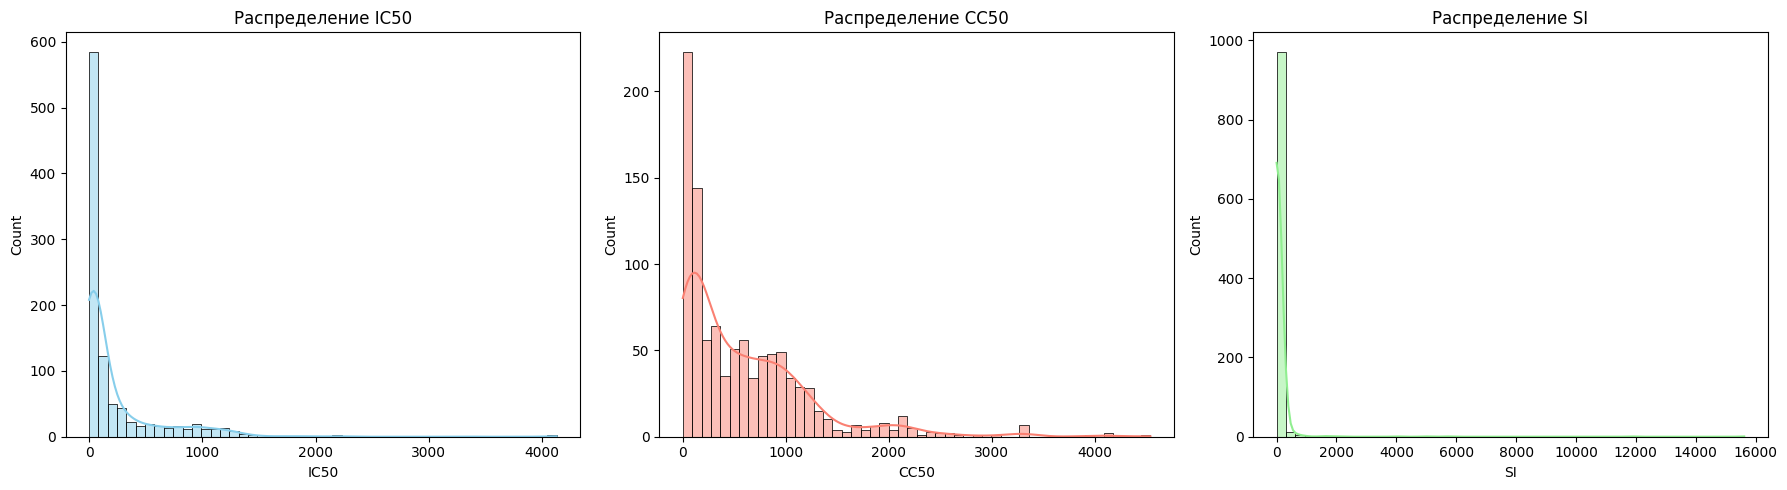

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# IC50
plt.subplot(1, 3, 1)
sns.histplot(df['IC50'], bins=50, kde=True, color='skyblue')
plt.title('Распределение IC50')

# CC50
plt.subplot(1, 3, 2)
sns.histplot(df['CC50'], bins=50, kde=True, color='salmon')
plt.title('Распределение CC50')

# SI
plt.subplot(1, 3, 3)
sns.histplot(df['SI'], bins=50, kde=True, color='lightgreen')
plt.title('Распределение SI')

plt.tight_layout()
plt.show()


Распределение IC50:
Имеет правостороннее смещение с выраженным хвостом. Основная масса значений сосредоточена вблизи нуля, наблюдаются выбросы с высокими значениями.

Распределение CC50:
Аналогично IC50, распределение смещено вправо. Присутствуют значительные выбросы, значения варьируются в широком диапазоне.

Распределение SI:
Большинство значений сосредоточено вблизи нуля, присутствует длинный хвост вправо. Распределение несимметричное, содержит аномальные пики и выбросы.



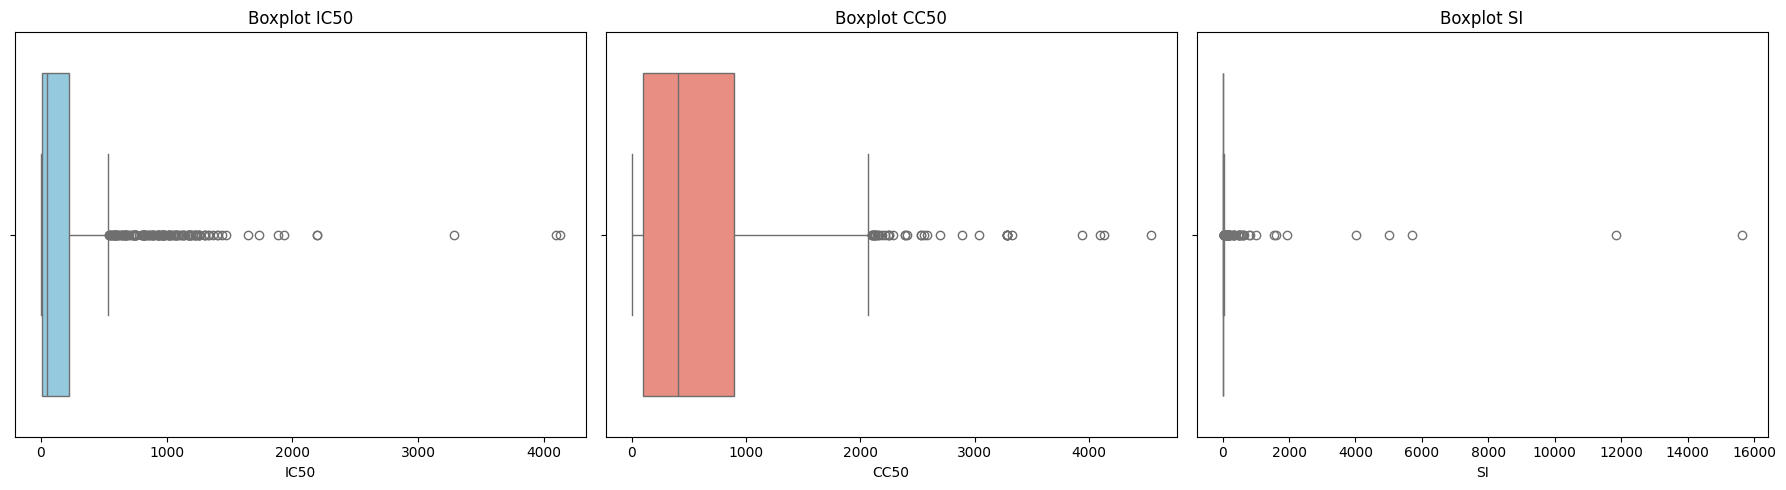

In [9]:
plt.figure(figsize=(18, 5))

# Boxplot IC50
plt.subplot(1, 3, 1)
sns.boxplot(x=df['IC50'], color='skyblue')
plt.title('Boxplot IC50')

# Boxplot CC50
plt.subplot(1, 3, 2)
sns.boxplot(x=df['CC50'], color='salmon')
plt.title('Boxplot CC50')

# Boxplot SI
plt.subplot(1, 3, 3)
sns.boxplot(x=df['SI'], color='lightgreen')
plt.title('Boxplot SI')

plt.tight_layout()
plt.show()


Boxplot IC50:
Наблюдается значительное количество выбросов выше верхнего квартили, что подтверждает наличие асимметричного распределения. Основная масса значений сконцентрирована в нижней части шкалы.

Boxplot CC50:
Имеет аналогичную структуру с множественными выбросами в правой части. Распределение сильно скошено, что может потребовать логарифмирования или удаления крайних значений.

Boxplot SI:
Характеризуется высокой плотностью значений около нижней границы, при этом присутствуют выраженные выбросы, включая экстремальные значения выше 10 000. Это указывает на нестабильность отношения CC50/IC50 у отдельных соединений.

In [10]:
# Подсчёт общего количества пропущенных значений (NaN) во всём DataFrame
NaNs_count = df.isna().sum().sum()
print(f"Общее количество NaN: {NaNs_count}")


Общее количество NaN: 0


In [11]:
df.isna().sum().sort_values(ascending=False).head(10)


,0
Unnamed: 0,0
IC50,0
CC50,0
SI,0
MaxAbsEStateIndex,0
MaxEStateIndex,0
MinAbsEStateIndex,0
MinEStateIndex,0
qed,0
SPS,0


In [12]:
# Удалим столбец с индексами
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
from sklearn.feature_selection import VarianceThreshold

# только признаки с дисперсией > 0
selector = VarianceThreshold(threshold=0.0)
selector.fit(df.select_dtypes(include=['float64', 'int64']))
low_variance_columns = df.select_dtypes(include=['float64', 'int64']).columns[~selector.get_support()]
print(f"Удаляем {len(low_variance_columns)} признаков с нулевой дисперсией:")
print(low_variance_columns.tolist())

# Удалим
df.drop(columns=low_variance_columns, inplace=True)

Удаляем 18 признаков с нулевой дисперсией:
['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']


В ходе анализа удалены 18 признаков, имеющих нулевую дисперсию, то есть принимающих одно и то же значение во всех наблюдениях. Такие признаки не несут информативности для моделей, так как не объясняют вариативность целевой переменной.
Среди них присутствуют химические дескрипторы, связанные с редкими или отсутствующими функциональными группами (например, fr_barbitur, fr_azide, fr_diazo), которые встречаются крайне редко в молекулах из текущего датасета. Их исключение оправдано, так как они не могут повлиять на обучение моделей.

In [15]:
print(df.columns.tolist())

['IC50', 'CC50', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 

In [17]:
def remove_outliers_iqr(df, column): # удаление выбросов IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    print(f"{column}: удалено {df.shape[0] - filtered_df.shape[0]} выбросов")
    return filtered_df

# целевые признаки
df = remove_outliers_iqr(df, 'IC50')
df = remove_outliers_iqr(df, 'CC50')
df = remove_outliers_iqr(df, 'SI')


IC50: удалено 145 выбросов
CC50: удалено 52 выбросов
SI: удалено 94 выбросов


In [18]:
import numpy as np #логарифмирование целевых переменных

df['log_IC50'] = np.log1p(df['IC50'])
df['log_CC50'] = np.log1p(df['CC50'])
df['log_SI'] = np.log1p(df['SI'])


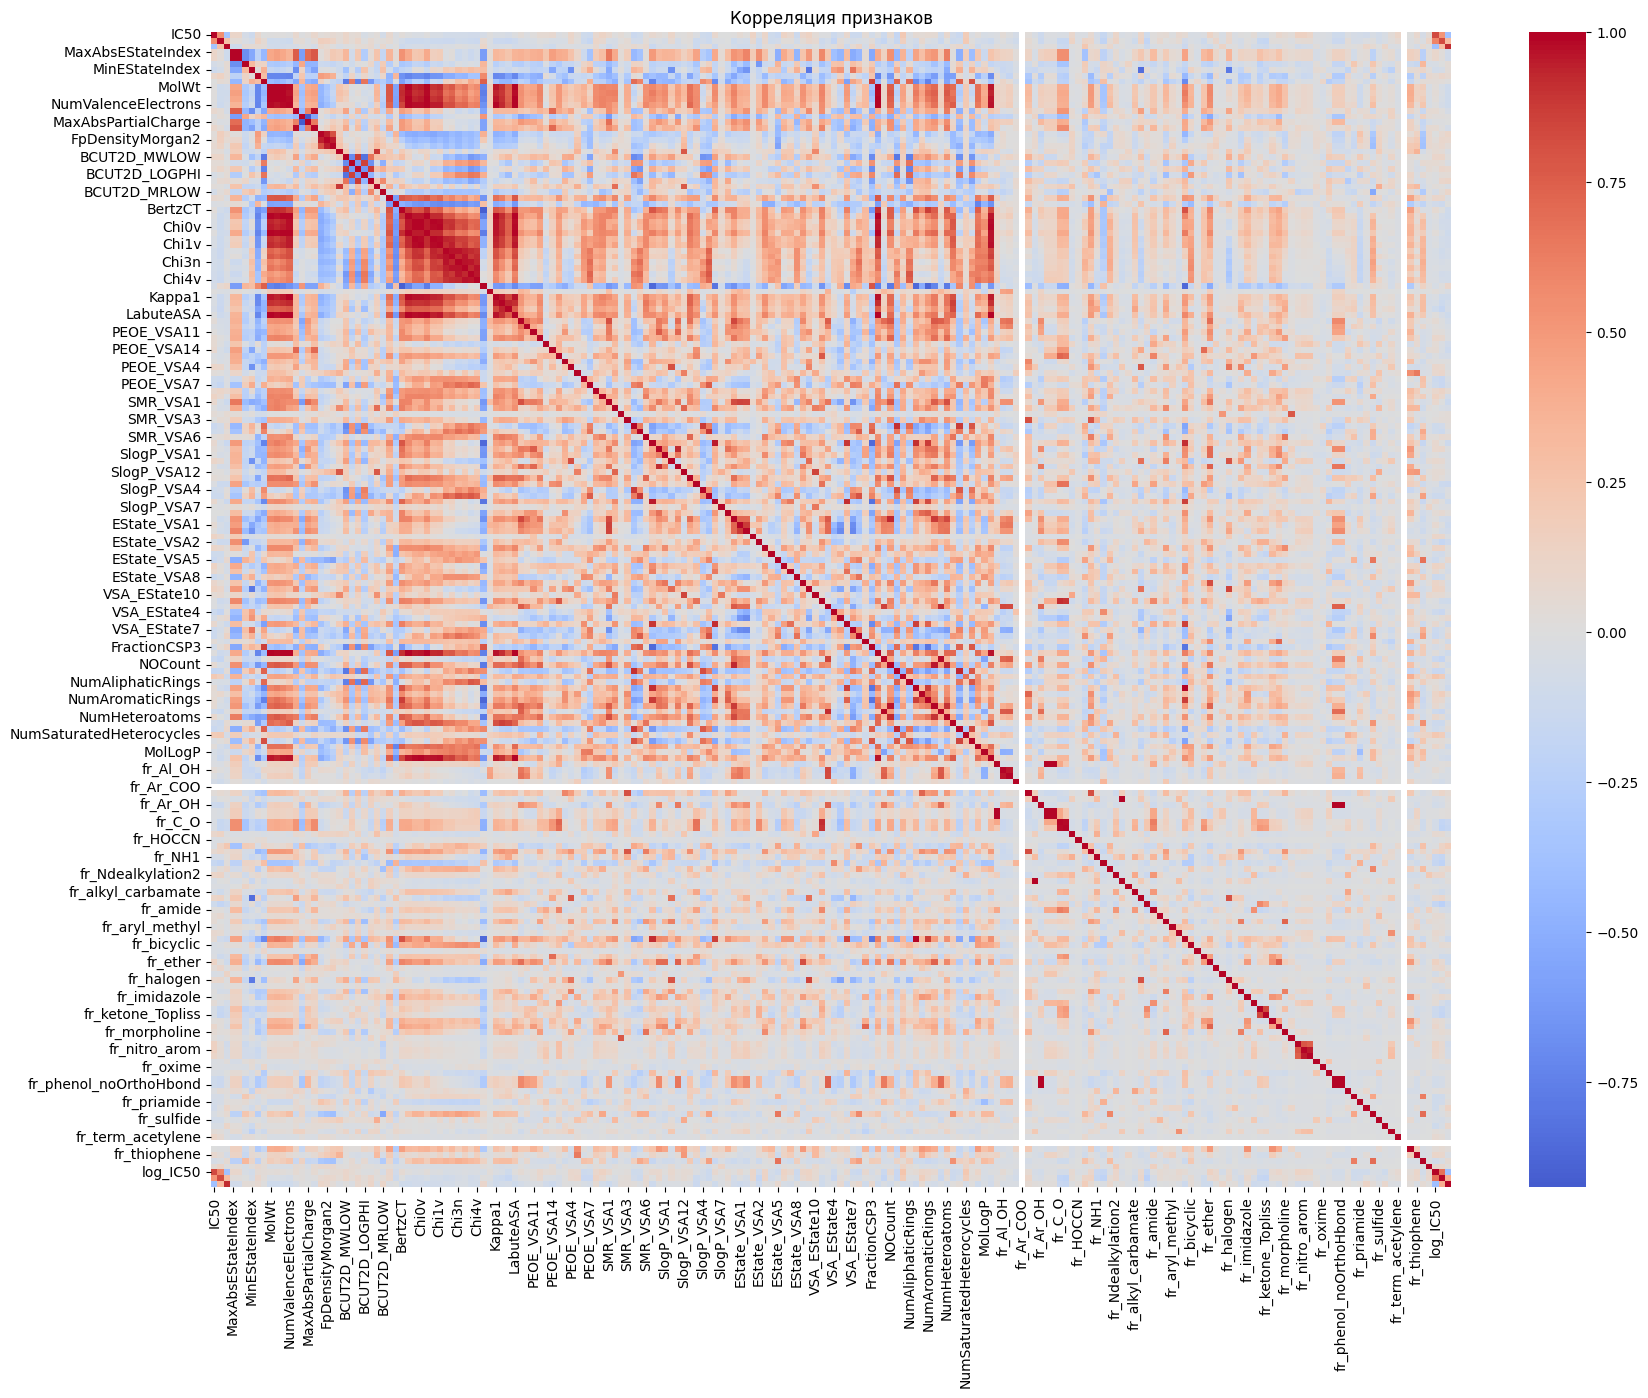

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Корреляция признаков")
plt.show()


In [20]:
def remove_correlated_features(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Удалено {len(to_drop)} признаков с корреляцией > {threshold}")
    return data.drop(columns=to_drop)

df = remove_correlated_features(df, threshold=0.9)


Удалено 49 признаков с корреляцией > 0.9


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def clean_dataset_by_target(df, target_col, drop_cols, color_box='skyblue', color_violin='lightgrey', color_points='navy', cmap='viridis'):
    print(f"\n Обработка признака: {target_col}")

    #  удаление других целевых признаков
    dataset = df.drop(columns=drop_cols, errors='ignore')

    #  до очистки
    plt.figure(figsize=(20, 5))
    plt.suptitle(f"До удаления выбросов ({target_col})", fontsize=14)

    plt.subplot(1, 5, 1)
    sns.boxplot(y=dataset[target_col], color=color_box)
    plt.title('Boxplot')

    plt.subplot(1, 5, 2)
    sns.violinplot(y=dataset[target_col], color=color_violin)
    plt.title('Violinplot')

    plt.subplot(1, 5, 3)
    sns.stripplot(y=dataset[target_col], color=color_points, size=2, alpha=0.4)
    plt.title('Точечный график')

    plt.subplot(1, 5, 4)
    sns.scatterplot(data=dataset.reset_index(), x='index', y=target_col,
                    hue=target_col, palette=cmap, size=target_col, legend=False)
    plt.title('Hue-график')

    plt.subplot(1, 5, 5)
    sns.histplot(dataset[target_col], bins=50, color=color_box, kde=False)
    plt.title('Гистограмма')

    plt.tight_layout()
    plt.show()

    # IQR
    Q1 = dataset[target_col].quantile(0.25)
    Q3 = dataset[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    dataset_clean = dataset[(dataset[target_col] >= lower) & (dataset[target_col] <= upper)]
    print(f"{target_col}: удалено {df.shape[0] - dataset_clean.shape[0]} строк как выбросы")

    return dataset_clean



 Обработка признака: IC50


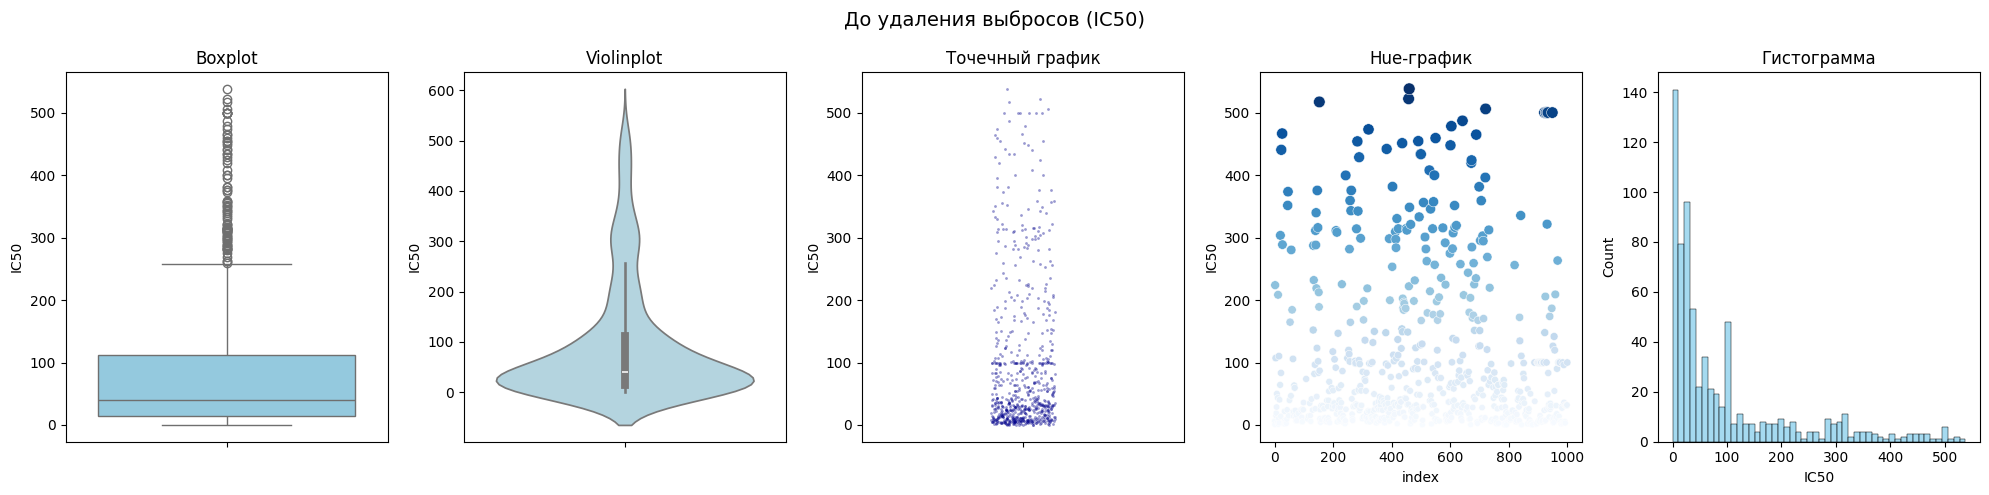

IC50: удалено 90 строк как выбросы

 Обработка признака: CC50


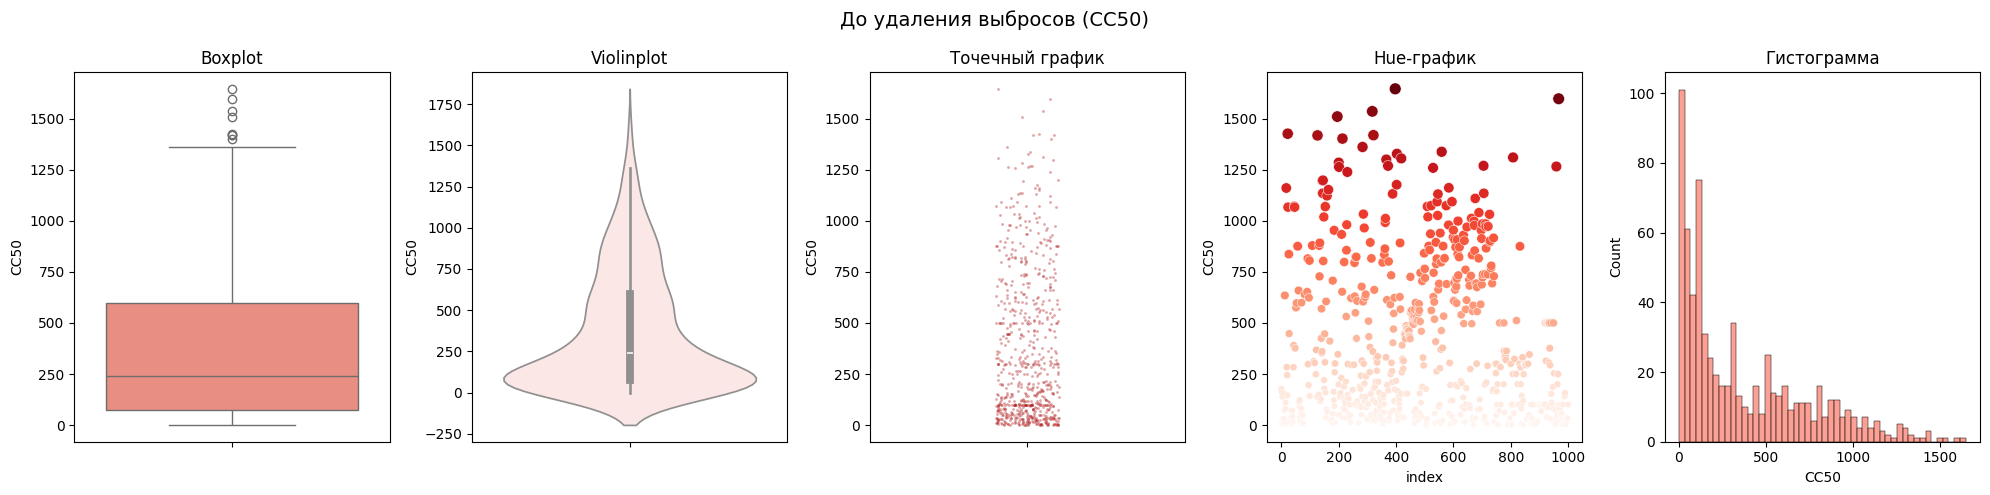

CC50: удалено 8 строк как выбросы

 Обработка признака: SI


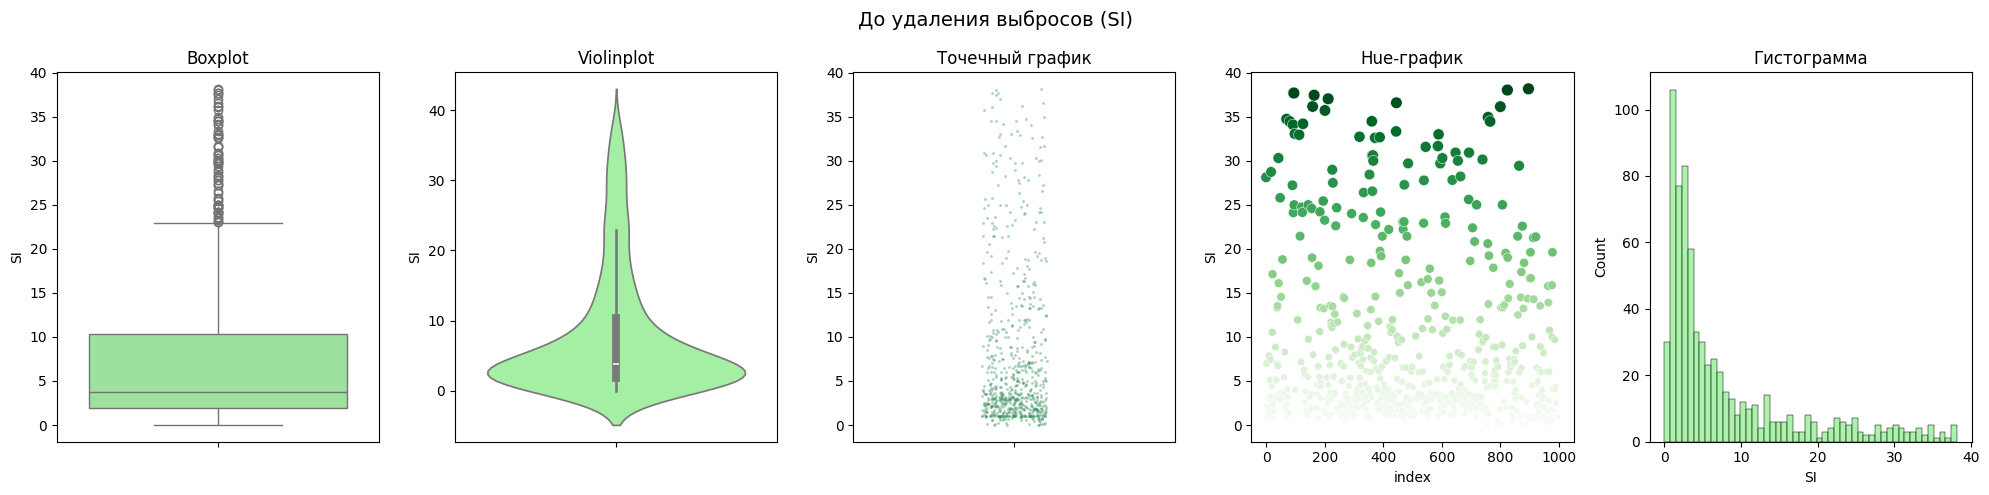

SI: удалено 72 строк как выбросы


In [27]:
# IC50 (удаляем CC50 и SI)
dataset_for_IC50_clean = clean_dataset_by_target(
    df, target_col='IC50', drop_cols=['CC50', 'SI'],
    color_box='skyblue', color_violin='lightblue', color_points='darkblue', cmap='Blues'
)

# CC50 (удаляем IC50 и SI)
dataset_for_CC50_clean = clean_dataset_by_target(
    df, target_col='CC50', drop_cols=['IC50', 'SI'],
    color_box='salmon', color_violin='mistyrose', color_points='firebrick', cmap='Reds'
)

# SI (удаляем IC50 и CC50)
dataset_for_SI_clean = clean_dataset_by_target(
    df, target_col='SI', drop_cols=['IC50', 'CC50'],
    color_box='lightgreen', color_violin='palegreen', color_points='seagreen', cmap='Greens'
)


In [28]:
dataset_for_IC50_clean.to_csv('dataset_for_IC50_clean.csv', index=False)
dataset_for_CC50_clean.to_csv('dataset_for_CC50_clean.csv', index=False)
dataset_for_SI_clean.to_csv('dataset_for_SI_clean.csv', index=False)